# Work hours vs alcool consumption

As with many of my viz, this one started with a Twitter discussion.

Japan has a well known alcool problem, where health problems are well documented but there is no social stigma linked with frequent alcool consumption. This leads to many Japanese saying drinking alcool (just drinking, not the knowledge, culture or anything adjacent) is their one and only hobby.

The main hypotethis of this discussion was that alcool consumption was to offset the brutal work hours.

Let's have a look.

## Data sources

Working hours: OECD - https://data.oecd.org/emp/hours-worked.htm

Alcool consumption: WHO https://www.who.int/gho/alcohol/consumption_levels/total_adult_percapita/en/

## Loading and preprocessing data

In [2]:
library(tidyverse)
library(ggthemes)

alcohol <- read.csv('alcohol.csv', skip=4) %>% select(c(1,2, "X2016")) %>% rename(Alcohol = X2016)

head(alcohol)

workhours <- read.csv('workhours.csv') %>% 
    filter(Employment.status == "Total employment" & Time == 2016) %>% 
    select(COUNTRY, Country, Value) %>%
    rename(WorkHours = Value)

head(workhours)

Country.Name,Country.Code,Alcohol
Aruba,ABW,NA
Afghanistan,AFG,0.2000000
Angola,AGO,6.4000000
Albania,ALB,7.5000000
Andorra,AND,11.3000000
Arab World,ARB,0.6148344


COUNTRY,Country,WorkHours
AUS,Australia,1672.2
AUT,Austria,1488.0
BEL,Belgium,1546.0
CAN,Canada,1706.0
CZE,Czech Republic,1778.0
DNK,Denmark,1414.0


In [3]:
workAlcohol <- merge(alcohol, workhours, by.x='Country.Code', by.y='COUNTRY') %>% 
    select(Country, Country.Code, Alcohol, WorkHours)

head(workAlcohol)

Country,Country.Code,Alcohol,WorkHours
Australia,AUS,10.6,1672.2
Austria,AUT,11.6,1488.0
Belgium,BEL,12.1,1546.0
Canada,CAN,8.9,1706.0
Switzerland,CHE,11.5,1590.0
Chile,CHL,9.3,1974.0


## Center points

In [4]:
meanAlc <- workAlcohol$Alcohol %>% mean()
meanWork <- workAlcohol$WorkHours %>% mean()

## Main vizualization

Basic scatter plot with a few (too many) countries highlighted for reference.

Highlighted countries have either longer work hours or higher alcohol consumption than Japan.

Saving 7 x 7 in image


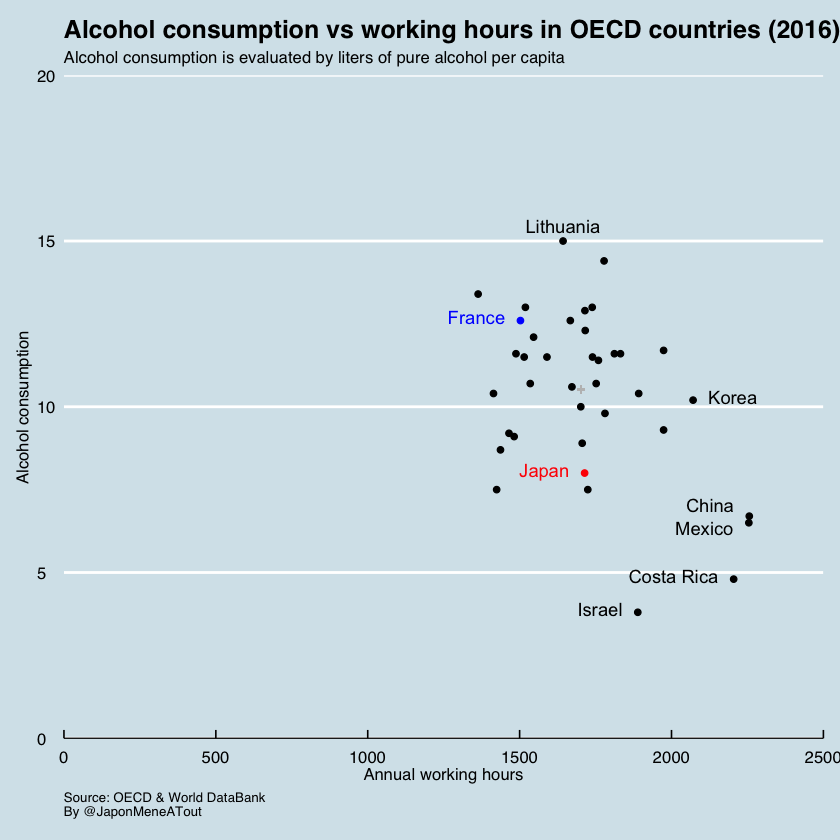

In [6]:
ggplot(data = workAlcohol %>% filter(!Country %in% c('France', 'Japan', 'Korea', 'Mexico', 'Costa Rica', 'Israel')), mapping = aes(WorkHours, Alcohol)) +
    geom_point() +
    geom_point(data = workAlcohol %>% filter(Country == 'Japan'), colour='red') +
    geom_text(data = workAlcohol %>% filter(Country == 'Japan'), colour='red', aes(label=Country), hjust=1, vjust=0.25, nudge_x=-50) +
    geom_point(data = workAlcohol %>% filter(Country == 'France'), colour='blue') +
    geom_text(data = workAlcohol %>% filter(Country == 'France'), colour='blue', aes(label=Country), hjust=1, vjust=0.25, nudge_x=-50) +
    geom_point(data = workAlcohol %>% filter(Country == 'Korea')) +
    geom_text(data = workAlcohol %>% filter(Country == 'Korea'), aes(label=Country), hjust=0, vjust=0.25, nudge_x=50) +
    geom_point(data = workAlcohol %>% filter(Country == 'Mexico')) +
    geom_text(data = workAlcohol %>% filter(Country == 'Mexico'), aes(label=Country), hjust=1, vjust=0.25, nudge_x=-50, nudge_y=-0.25) +
    geom_point(data = workAlcohol %>% filter(Country == 'Costa Rica')) +
    geom_text(data = workAlcohol %>% filter(Country == 'Costa Rica'), aes(label=Country), hjust=1, vjust=0.25, nudge_x=-50) +
    geom_point(data = workAlcohol %>% filter(Country == 'Israel')) +
    geom_text(data = workAlcohol %>% filter(Country == 'Israel'), aes(label=Country), hjust=1, vjust=0.25, nudge_x=-50) +

    geom_text(data = workAlcohol %>% filter(Country == 'Lithuania'), aes(label=Country), hjust=0.5, vjust=0.25, nudge_y=0.35) +

    # adding China which was not in the OECD
    geom_point(data=data.frame(c(1)), aes(47*48, 6.7)) +
    geom_text(data= data.frame(c(1)), aes(47*48, 6.7, label='China'), hjust=1, vjust=0.25, nudge_x=-50, nudge_y=0.25) +

    geom_point(aes(meanWork, meanAlc), shape='+', size = 3, color='gray')+
#     geom_text(aes(500, 5, label='Average'))+
#     geom_text(aes(label=Country)) +
    coord_cartesian(
        expand = F,
        xlim = c(0, 2500),
        ylim = c(0, 20)
    ) +
    labs(
        title = "Alcohol consumption vs working hours in OECD countries (2016)",
        subtitle = "Alcohol consumption is evaluated by liters of pure alcohol per capita",
        caption = "Source: OECD & World DataBank\nBy @JaponMeneATout",
        y = "Alcohol consumption",
        x = "Annual working hours"
    ) +
    theme_economist() +
    theme(
        plot.caption = element_text(hjust=0)
    )

ggsave("alcohol_vs_work.png")

## Conclusion

Highlighted countries show that offsetting long work hours is too simple an explanation.

## What could be done

- Highlight less countries.
- use a variable in the dataframe to highlight (though less precision for label positioning)